In [4]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/inv_data_reg.csv')
data.head()

,GENDER,CUST_SAVING_AMT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_PRIDEPT_AMT,CUST_AUM,...,OCN,age,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CUST_FINA_AMT
0,1,444836.17,18,10,247635.98,0.0,0.0,0.0,0,692472.15,...,4,51,1,0,0,0,0,0,0,0.00
1,2,1940264.01,34,8,0.00,0.0,0.0,0.0,0,1940264.01,...,2,47,1,0,0,0,0,0,0,0.00
2,2,799782.62,12,10,153399.59,0.0,0.0,0.0,0,12388909.47,...,4,55,1,0,0,0,0,0,0,11435727.26
3,2,1006.72,6,0,0.00,0.0,0.0,0.0,0,1006.72,...,2,40,1,0,0,0,0,0,0,0.00
4,2,87179.95,27,10,0.00,0.0,8848.8,0.0,0,96028.75,...,4,37,1,0,0,0,0,0,0,0.00


In [17]:
numeric_features = ['CUST_SAVING_AMT','CUST_ACCOUNT_CNT','CUST_PRODUCT_CNT','CUST_FOND_AMT','CUST_NADEBT_AMT','CUST_YBT_AMT','CUST_METAL_AMT','CUST_PRIDEPT_AMT','CUST_AUM','CUST_ASSET_AMT','CUST_DEBT_AMT','CUST_ACCOUNT_OPEN_CNT','age']
data[numeric_features + ['CUST_FINA_AMT']].describe()

,CUST_SAVING_AMT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_PRIDEPT_AMT,CUST_AUM,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_ACCOUNT_OPEN_CNT,age,CUST_FINA_AMT
count,7.733700e+04,77337.000000,77337.000000,7.733700e+04,7.733700e+04,7.733700e+04,77337.000000,7.733700e+04,7.733700e+04,7.733700e+04,7.733700e+04,77337.000000,77337.000000,7.733700e+04
mean,1.281568e+05,4.630125,2.788601,1.338631e+04,4.922782e+03,9.863874e+02,29.741455,1.034434e+02,2.838340e+05,2.838340e+05,1.042589e+05,12.944244,47.233549,1.362485e+05
std,8.105004e+05,7.620083,2.823735,1.228747e+05,8.014320e+04,2.458950e+04,1808.943975,2.034129e+04,1.404058e+06,1.404058e+06,7.819366e+05,28.339609,11.663216,9.489373e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.370230e+03,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.819530e+03,1.819530e+03,0.000000e+00,1.000000,38.000000,0.000000e+00
50%,9.236360e+03,2.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.433005e+04,1.433005e+04,0.000000e+00,4.000000,45.000000,0.000000e+00
75%,5.963251e+04,6.000000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.228918e+05,1.228918e+05,0.000000e+00,12.000000,54.000000,0.000000e+00
max,6.338829e+07,1122.000000,16.000000,1.294265e+07,7.620000e+06,5.114787e+06,388017.080000,4.000000e+06,7.302702e+07,7.302702e+07,8.031333e+07,2221.000000,97.000000,6.479122e+07


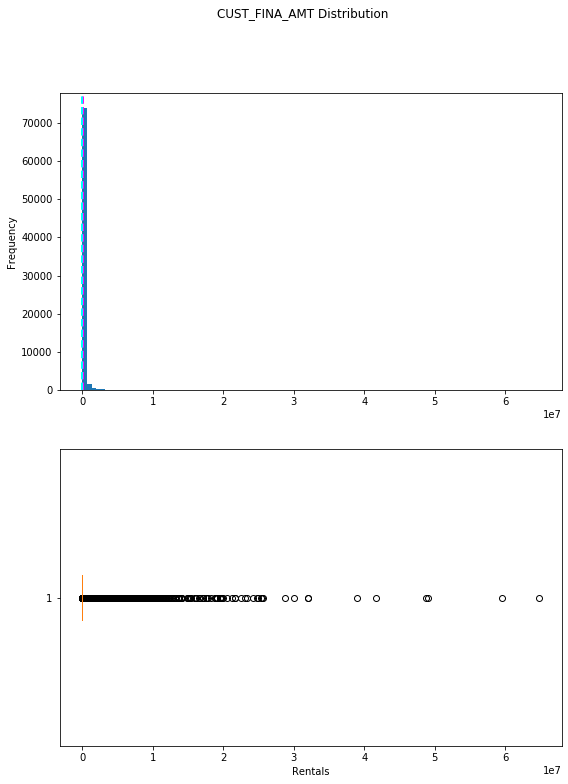

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

label = data['CUST_FINA_AMT']

fig, ax = plt.subplots(2, 1, figsize = (9,12))

# 绘制柱状图  
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# 绘制boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# 为图标添加一个标题
fig.suptitle('CUST_FINA_AMT Distribution')

# 展示
fig.show()

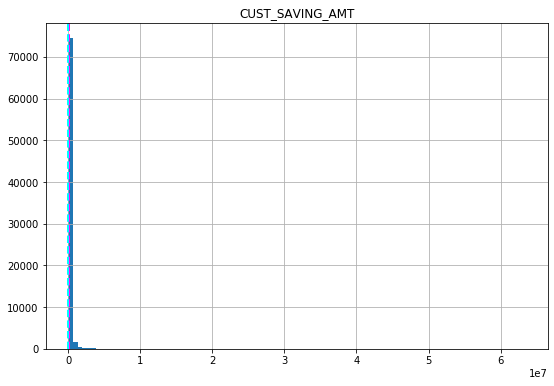

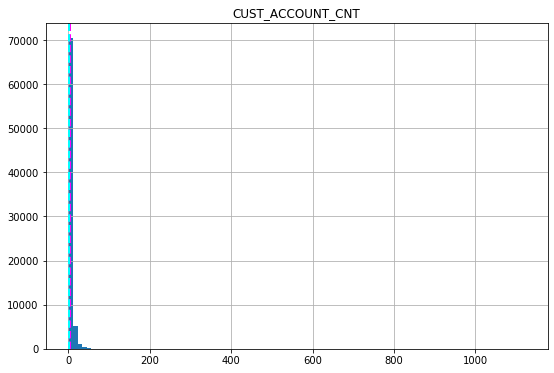

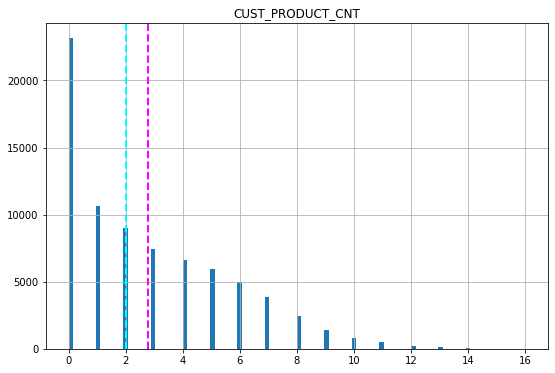

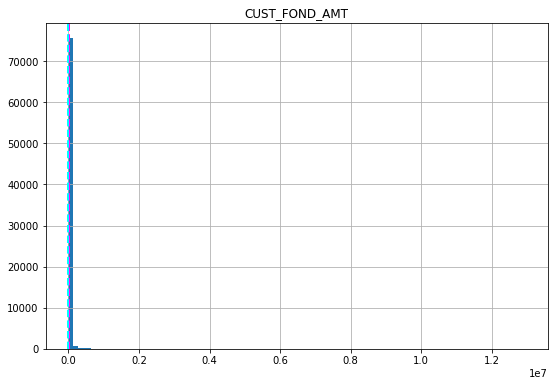

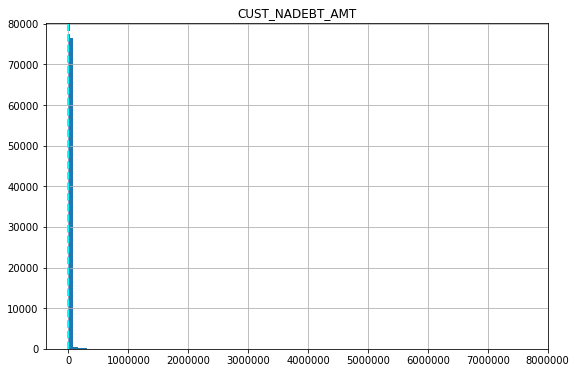

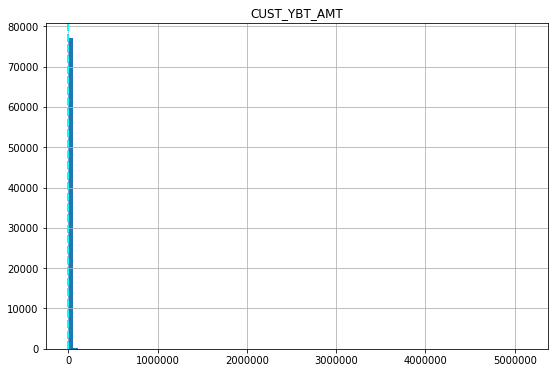

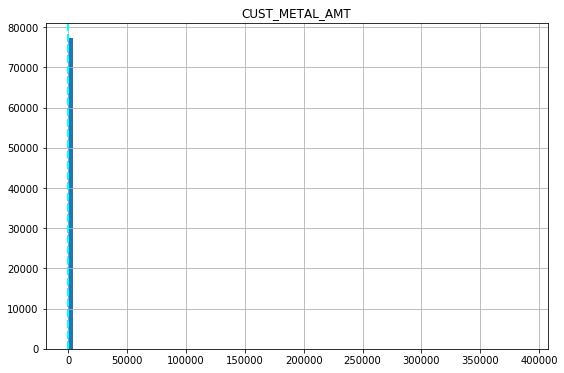

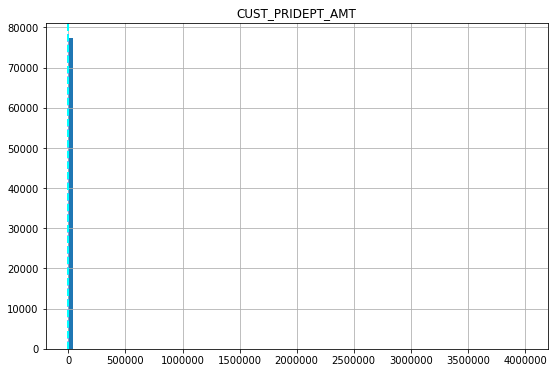

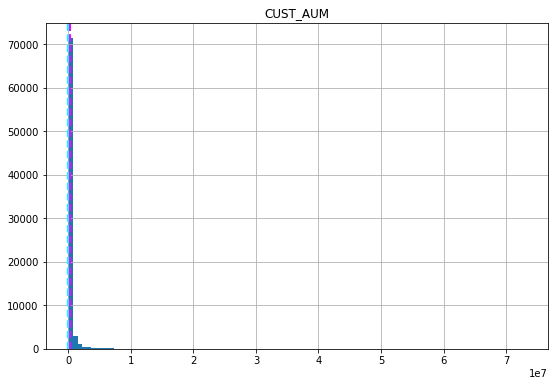

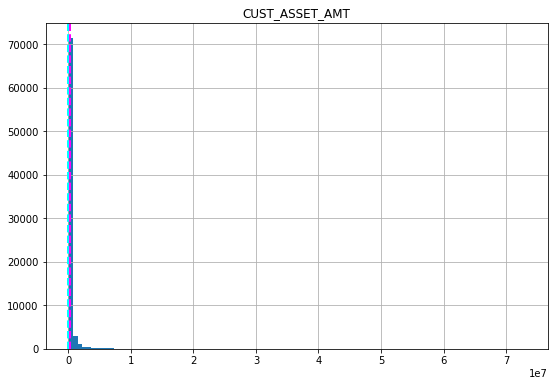

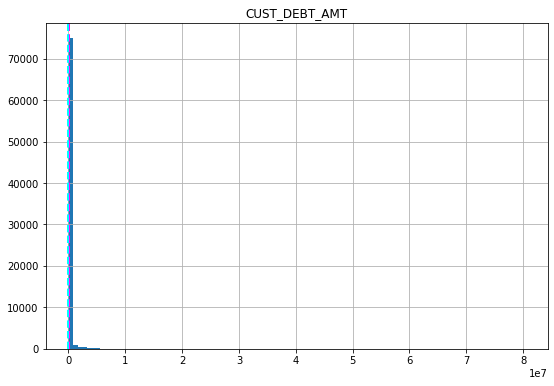

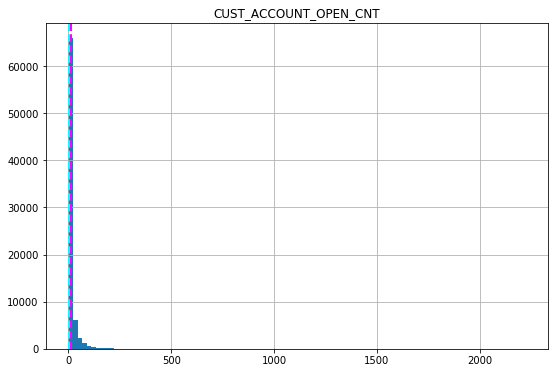

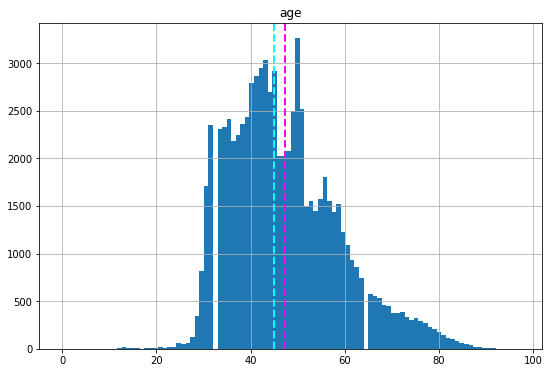

In [19]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

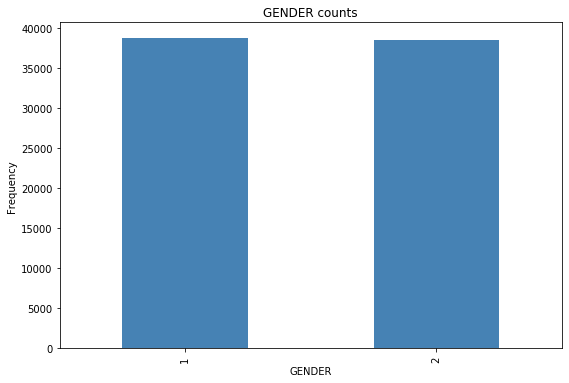

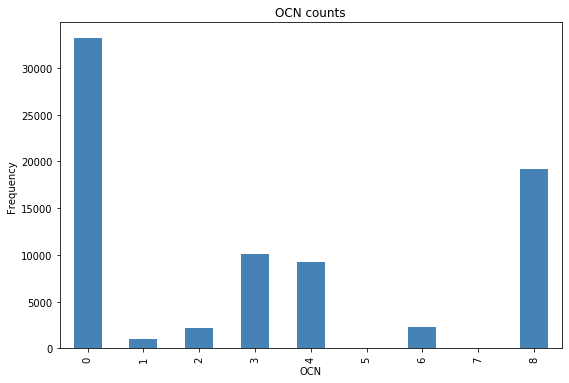

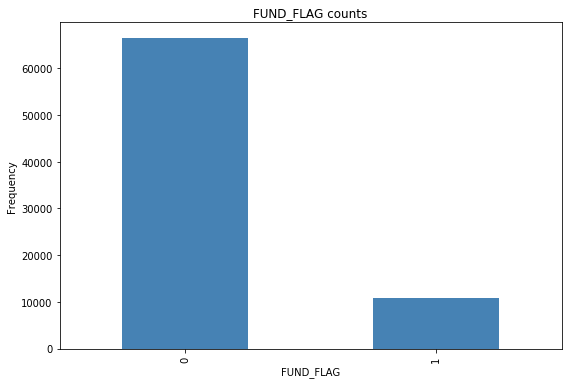

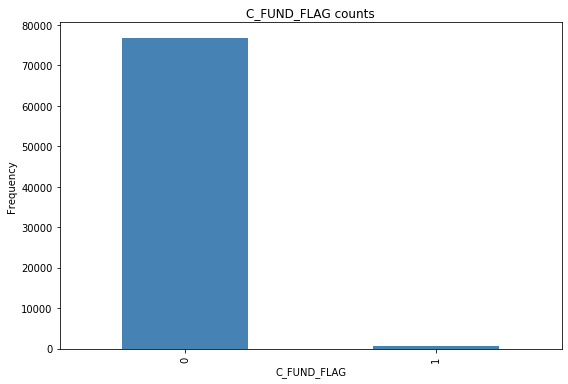

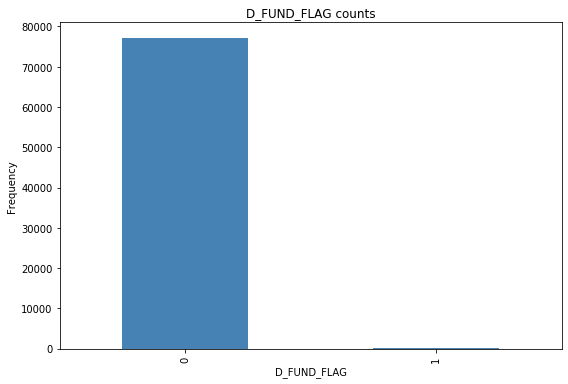

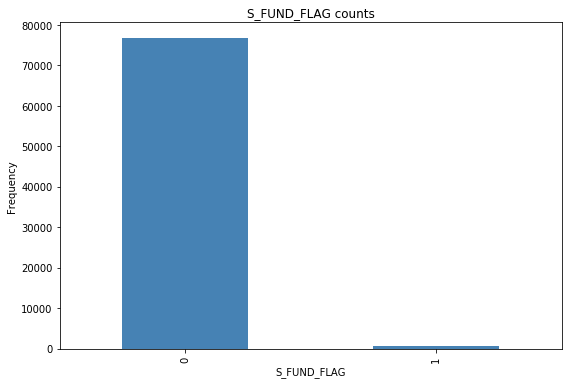

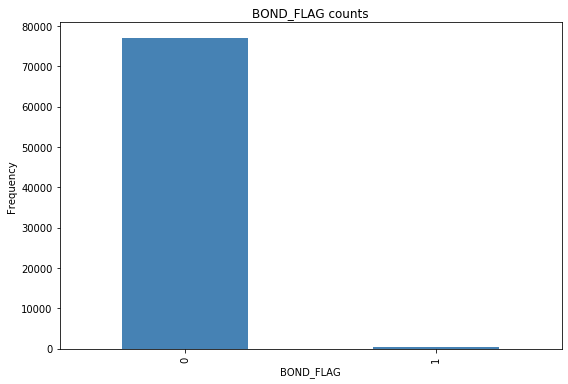

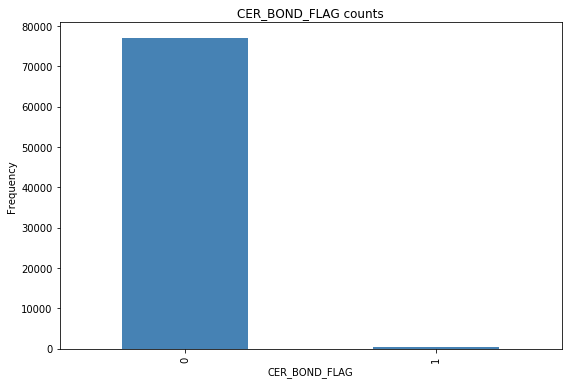

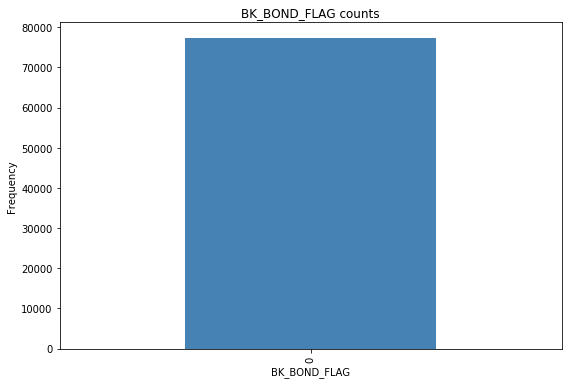

In [20]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['GENDER','OCN','FUND_FLAG','C_FUND_FLAG','D_FUND_FLAG','S_FUND_FLAG','BOND_FLAG','CER_BOND_FLAG','BK_BOND_FLAG']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [21]:
X, y = data[['CUST_SAVING_AMT','CUST_ACCOUNT_CNT','CUST_PRODUCT_CNT','CUST_FOND_AMT','CUST_NADEBT_AMT','CUST_YBT_AMT','CUST_METAL_AMT','CUST_PRIDEPT_AMT','CUST_AUM','CUST_ASSET_AMT','CUST_DEBT_AMT','CUST_ACCOUNT_OPEN_CNT','OCN','age','GENDER','OCN','FUND_FLAG','C_FUND_FLAG','D_FUND_FLAG','S_FUND_FLAG','BOND_FLAG','CER_BOND_FLAG','BK_BOND_FLAG']].values, data['CUST_FINA_AMT'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[4.44836170e+05 1.80000000e+01 1.00000000e+01 2.47635980e+05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.92472150e+05 6.92472150e+05 0.00000000e+00 1.18000000e+02
  4.00000000e+00 5.10000000e+01 1.00000000e+00 4.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.94026401e+06 3.40000000e+01 8.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.94026401e+06 1.94026401e+06 2.20403030e+05 3.60000000e+01
  2.00000000e+00 4.70000000e+01 2.00000000e+00 2.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.99782620e+05 1.20000000e+01 1.00000000e+01 1.53399590e+05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.23889095e+07 1.23889095e+07 0.00000000e+00 3.10000000e+01
  4.00000000e+00 5.50000000e+01 2.00000000e+00 4.00000000e+00
  1.00000000e+00 0.0000000

In [22]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 54135 rows
Test Set: 23202 rows


In [23]:
from sklearn.linear_model import LinearRegression

# 在训练集上拟合一个线性回归模型
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [24]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [     -0.      -0.      -0. 1000000.      -0.      -0.      -0.      -0.
      -0.      -0.]
Actual labels   :  [      0.       0.       0. 1000000.       0.       0.       0.       0.
       0.       0.]


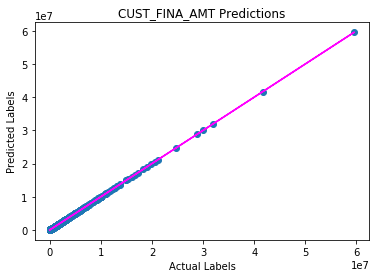

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 8.498407415653021e-19
RMSE: 9.218680716704002e-10
R2: 1.0


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

MSE: 0.13625045021105237
RMSE: 0.36912118634813196
R2: 0.99999999999986


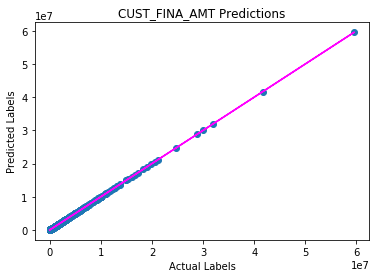

In [27]:
from sklearn.linear_model import Lasso

# 在训练集上拟合Lasso模型
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# 使用测试数据评估模型
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# 绘制预测与实际的对比图
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions')
# 叠加回归线
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# 训练
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# 可视化树模型
tree = export_text(model)
print(tree)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 

|--- feature_9 <= 7008426.50
|   |--- feature_9 <= 2010914.12
|   |   |--- feature_9 <= 548723.81
|   |   |   |--- feature_8 <= 200362.45
|   |   |   |   |--- feature_8 <= 100297.93
|   |   |   |   |   |--- feature_8 <= 50076.39
|   |   |   |   |   |   |--- feature_8 <= 40817.84
|   |   |   |   |   |   |   |--- feature_8 <= 21828.54
|   |   |   |   |   |   |   |   |--- feature_8 <= 14408.32
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 57.50
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 13732.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |-

MSE: 127248446006.21855
RMSE: 356719.0014650447
R2: 0.8692378471467979


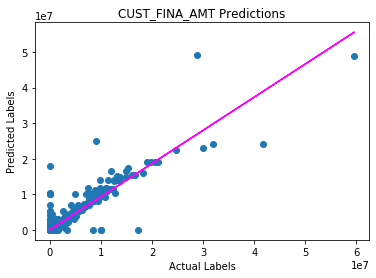

In [29]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 

MSE: 40343645297.14947
RMSE: 200857.27593778988
R2: 0.958542347049618


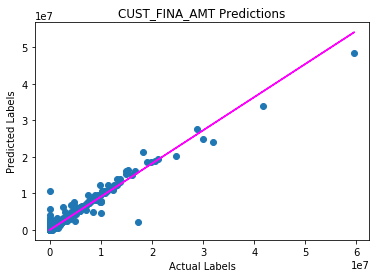

In [30]:
from sklearn.ensemble import RandomForestRegressor

# 训练
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 15763598081.90943
RMSE: 125553.16834675829
R2: 0.9838011222407985


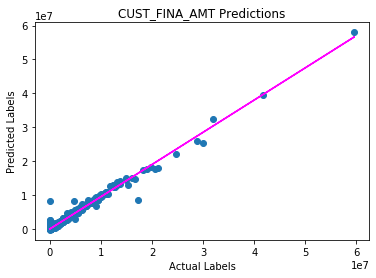

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 12862301490.6702
RMSE: 113412.08705720128
R2: 0.9867825322323796


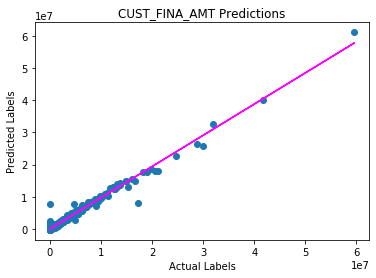

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [39]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4,5,6,7,8,9,10,11,12]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5,6,7,8]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]),
                                           

MSE: 14485418510.794283
RMSE: 120355.38422020963
R2: 0.985114596139284


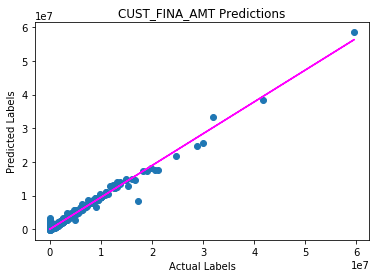

In [40]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]),
                                           

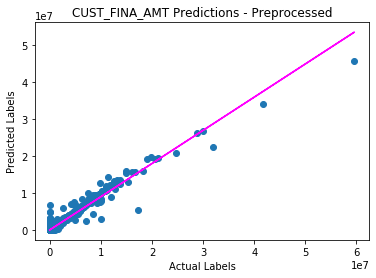

In [41]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CUST_FINA_AMT Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [37]:
import joblib

# 将模型保存为一个pickle文件
filename = './models/inv_predict.pkl'
joblib.dump(model, filename)

['./models/inv_predict.pkl']

In [38]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]


ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 23 and input n_features is 10.